## Filters from Scratch

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

In [2]:
shape = cv2.imread(r'data\shape.jpg',1)
cv2.imshow("Shapes",shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
shape.shape

In [3]:
# Converting a color image to gray scale 
shape_bw = cv2.cvtColor(shape,cv2.COLOR_BGR2GRAY)
print(shape.shape,shape_bw.shape) 

(648, 1152, 3) (648, 1152)


In [ ]:
cv2.imshow("Shapes",shape_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
vertical_fltr = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
vertical_fltr                       

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [5]:
horizontal_fltr = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
horizontal_fltr

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [6]:
h =shape_bw.shape[0] 
w =shape_bw.shape[1] 

i = 0
j = 0 

shape_vertical_fltr = [] 

while i < h -2: 
    t = []
    j = 0 
    while j < w -2: 
        t.append(np.multiply(shape_bw[i:i+3,j:j+3],vertical_fltr).sum())
        j+=1
    shape_vertical_fltr.append(t)
    i+=1

shape_vertical = np.array(shape_vertical_fltr)
shape_vertical.shape

(646, 1150)

In [ ]:
plt.imshow(shape_vertical)

In [ ]:
shape_vertical_final = shape_vertical.astype(np.uint8)

In [ ]:
cv2.imshow("Vertical ",shape_vertical_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite(r'data\shape Vertical filter.jpg', shape_vertical_final)

## Apply horizontal filter 

In [7]:
h =shape_bw.shape[0] 
w =shape_bw.shape[1] 

i = 0
j = 0 

shape_horizontal_fltr = [] 

while i < h -2: 
    t = []
    j = 0 
    while j < w -2: 
        t.append(np.multiply(shape_bw[i:i+3,j:j+3],horizontal_fltr).sum())
        j+=1
    shape_horizontal_fltr.append(t)
    i+=1

shape_horizontal = np.array(shape_horizontal_fltr)
shape_horizontal.shape

(646, 1150)

In [8]:
shape_horizontal = np.array(shape_horizontal_fltr)

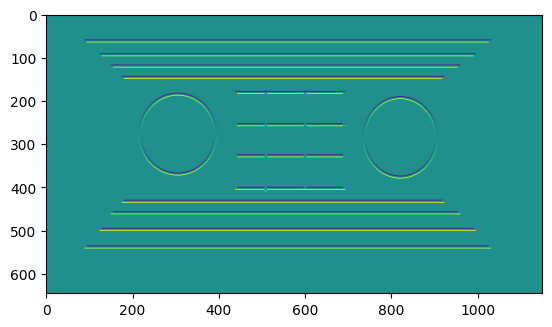

In [9]:
plt.imshow(shape_horizontal)

In [10]:
shape_horizontal_final = shape_horizontal.astype(np.uint8)

In [12]:
cv2.imshow("Horizontal",shape_horizontal_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
cv2.imwrite(r'data\shape Horizontal filter.jpg', shape_horizontal_final)

True

## Applying both filters together

In [14]:
vertical_result = cv2.filter2D(shape_bw,-1,vertical_fltr)
horizontal_result = cv2.filter2D(shape_bw,-1,horizontal_fltr)

In [15]:
# Combine 
combine_result = np.abs(vertical_result) + np.abs(horizontal_result)

In [17]:
cv2.imshow('Combined Result',combine_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Laplacian Filter

In [18]:
person = cv2.imread(r'data\lena.jpg',1) 
cv2.imshow('lena',person) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
person_lap = cv2.Laplacian(person,cv2.CV_64F)
person_lap = np.uint8(np.absolute(person_lap))
cv2.imshow('Laplacian filter',person_lap) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
cv2.imwrite(r'data\lena laplacian filter.jpg',person_lap)

True

## 3 X 3 Gaussian kernel 

In [22]:
person = cv2.imread(r'data\lena.jpg',1) 
cv2.imshow('lena',person) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
lena_gauss = cv2.GaussianBlur(person,(7,7),0)
cv2.imshow('lena',person) 
cv2.imshow('Gaussian filter',lena_gauss) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
cv2.imwrite(r'data\lena gaussian filter.jpg',lena_gauss)

True

## Median Blur 

In [25]:
person = cv2.imread(r'data\lena.jpg',1) 
cv2.imshow('lena',person) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
lena_median = cv2.medianBlur(person,5)
cv2.imshow('lena',person) 
cv2.imshow('Median filter',lena_median) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
cv2.imwrite(r'data\lena median filter.jpg',lena_median)

True

## Bilateral Blur 

In [ ]:
person = cv2.imread(r'data\lena.jpg',1) 
cv2.imshow('lena',person) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
lena_bilateral = cv2.bilateralFilter(person,9,75,75)
cv2.imshow('lena',person) 
cv2.imshow('Bilateral filter',lena_bilateral) 
cv2.waitKey(0)
cv2.destroyAllWindows()

## canny Filter 

In [ ]:
person = cv2.imread(r'data\lena.jpg',1) 
cv2.imshow('lena',person) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
lena_canny = cv2.Canny(person,100,200,apertureSize = 5, L2gradient = True)
cv2.imshow('lena',person) 
cv2.imshow('Canny filter',lena_canny) 
cv2.waitKey(0)
cv2.destroyAllWindows()

## Working with video using OpenCV

In [31]:
import numpy as np 
import cv2
from random import randint 

In [32]:
def get_color(): 
    return (randint(0,255),randint(0,255),randint(0,255))

In [34]:
cap = cv2.VideoCapture(0)
# 0 : webcam windows
# 1 2 3 : for external webcam 
# -1  : linux OS or macbook

frame_save = None
while True: 
    _,frame = cap.read()
    frame_save = frame 
    grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    res = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    res = np.array(res, dtype = np.float64)
    res = cv2.transform(res,np.matrix([[0.393,0.769,0.189],[0.349,0.686,0.168],[0.272,0.534,0.131]]))
    res[np.where(res > 255)] = 255
    res = np.array(res,dtype = np.uint8)
    res = cv2.cvtColor(res,cv2.COLOR_RGB2BGR)

    cv2.putText(frame,'Color',(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,get_color(),2)
    cv2.putText(grey,'grey',(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,get_color(),2)
    cv2.putText(res,'Filter',(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,get_color(),2)

    cv2.imshow("Grey camera" ,grey) 
    cv2.imshow("color camera" ,frame) 
    cv2.imshow("filter camera" ,res) 

    if cv2.waitKey(1) & 0XFF == ord('q'): 
        break


cap.release() 
cv2.destroyALLWindows() 

cv2.imwrite(r'data\greyphoto.jpg',grey)
cv2.imwrite(r'data\colorphoto.jpg',frame)
cv2.imwrite(r'data\filterphoto.jpg',res)

KeyboardInterrupt: 